In [5]:
%matplotlib inline

import matplotlib.pyplot as plt
plt.style.use = "default"

import numpy as np
import pandas as pd

pd.options.display.float_format = '{:,.3f}'.format

In [3]:
train = pd.read_csv("part1/data/TrainData1.txt", sep='\t')
labels = pd.read_csv("part1/data/TrainLabel1.txt", sep='\t')
labels = labels.rename(columns={"1": "label"})
merged = train.merge(labels, left_index=True,right_index=True)

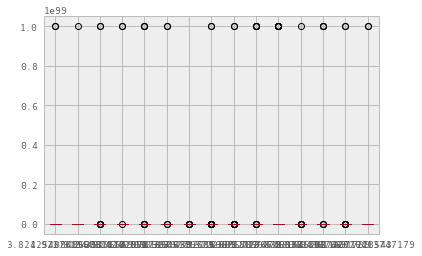

In [10]:
merged.iloc[:, 0:15].boxplot(return_type='axes')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x111bf35c0>,
      dtype=object)

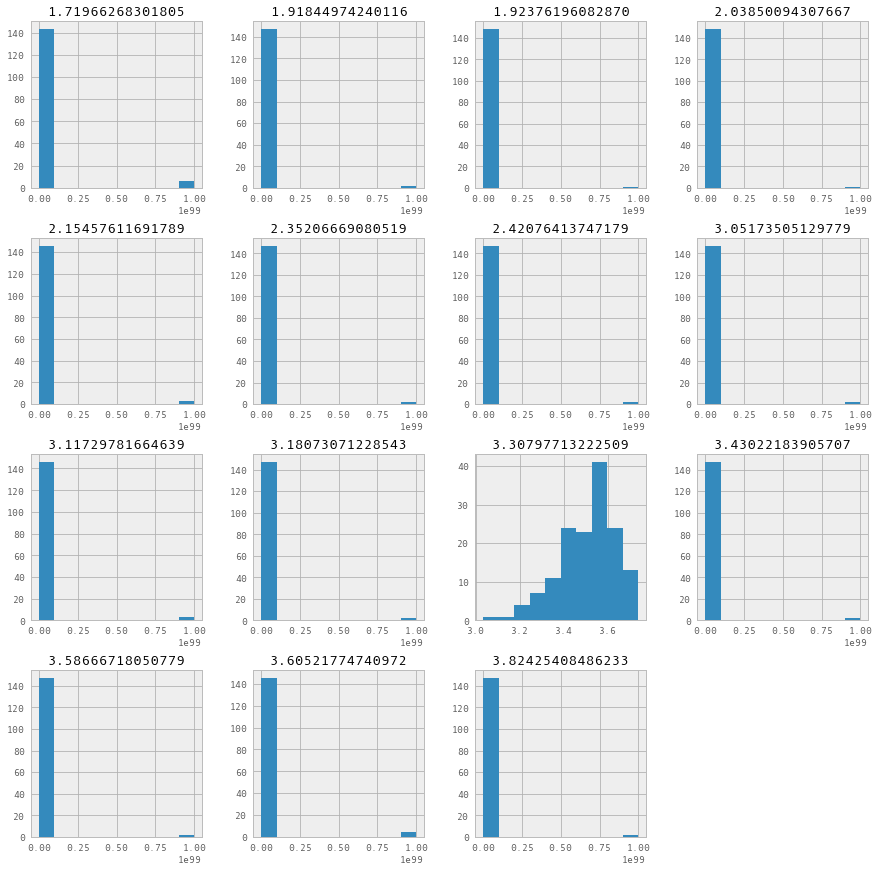

In [15]:
merged.iloc[:, 0:15].hist(figsize=(15,15))

In [ ]:
merged.groupby("label").hist()

KeyboardInterrupt: 

In [95]:
train.shape, labels.shape

((149, 3312), (149, 1))

In [96]:
merged.head(5)

,3.82425408486233,1.92376196082870,1.91844974240116,2.35206669080519,3.11729781664639,3.05173505129779,3.30797713222509,3.43022183905707,3.58666718050779,3.60521774740972,...,1.85564028089015.11,1.14238946611884.6,2.05434488876763.5,2.80822448109616,1.78218586649202.12,2.66570291403744.1,2.46821436276855.2,2.47858092374228.4,2.30884176126132.4,label
0,3.904,2.310,2.153,"1,000,000,000,000,000,088,752,974,568,224,758,2...",3.532,3.525,3.678,3.637,3.697,3.717,...,1.442,1.000,2.128,2.980,1.961,2.519,2.054,2.690,2.091,1
1,3.751,1.161,1.017,2.348,3.382,3.393,3.509,3.512,3.622,3.603,...,1.584,1.000,1.945,3.257,1.965,2.536,1.449,2.605,1.369,2
2,3.809,1.912,1.857,2.499,3.289,3.371,3.542,"1,000,000,000,000,000,088,752,974,568,224,758,2...",3.473,3.629,...,1.482,1.000,2.155,3.270,1.928,2.618,2.154,2.530,2.186,1
3,3.894,2.094,1.881,2.786,3.344,3.274,3.486,3.517,3.642,3.688,...,1.511,1.000,2.094,3.247,1.825,2.562,1.942,2.599,1.765,1
4,3.841,1.204,1.015,2.290,3.109,3.066,3.411,3.488,3.641,3.665,...,1.717,1.000,2.136,3.021,2.054,2.602,1.000,2.542,2.090,2


Hmm. We have A LOT of features here. Let's get a sense of what the data looks like by plotting this data starting with the first column

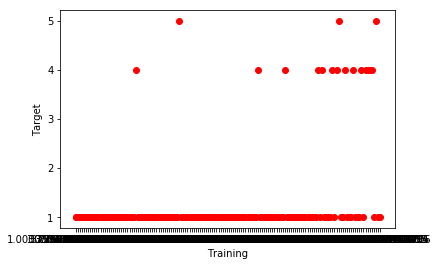

In [97]:
plt.scatter(train[[train.columns[0]]], labels, c="r")
plt.xlabel("Training")
plt.ylabel("Target")

plt.show()

Most of the values are 1. We'll get to analyzing the targets > 1 later, but i wonder if this is a trend in the other columns...

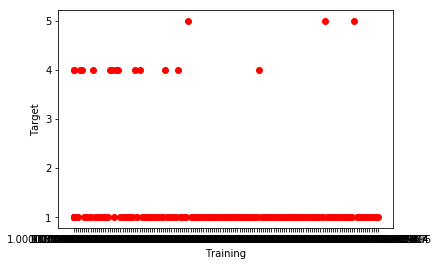

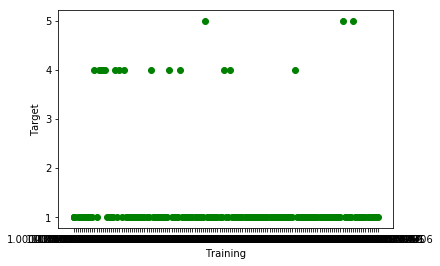

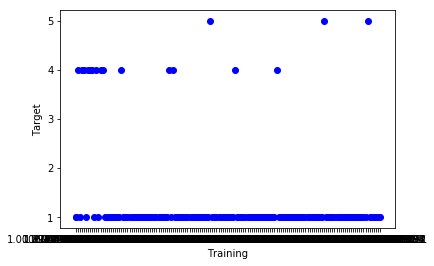

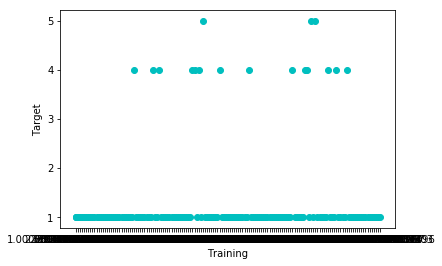

In [98]:
cols = train.columns[1:5]
plot_colors = ["r","g","b", "c","m", "y","k"]
for color, col in zip(plot_colors, cols):
    plt.scatter(train[[col]], labels, c=color)
    plt.xlabel("Training")
    plt.ylabel("Target")

    plt.show()

It _is_ a trend! Lets check out the probability distributions for these sets

In [99]:
labels = labels.rename(columns={"1": "label"})

In [100]:
cols = train.columns

In [ ]:
cols

Index(['3.82425408486233', '1.92376196082870', '1.91844974240116',
       '2.35206669080519', '3.11729781664639', '3.05173505129779',
       '3.30797713222509', '3.43022183905707', '3.58666718050779',
       '3.60521774740972',
       ...
       '1.83683028648888.12', '1.85564028089015.11', '1.14238946611884.6',
       '2.05434488876763.5', '2.80822448109616', '1.78218586649202.12',
       '2.66570291403744.1', '2.46821436276855.2', '2.47858092374228.4',
       '2.30884176126132.4'],
      dtype='object', length=3312)

In [ ]:

h = [labels.merge(train, left_index=True,right_index=True, left_on="label", right_on=col) for col in train.columns]    